# Hyper Parameter Tuning
예측모델의 하이퍼파라미터 최적화 하기 위해 GridSearchCV, RandomizedSearchCV를 사용한다.

## GridSearchCV
사용자가 제공한 값의 범위, 목록을 교차하여 모든 경우의 수를 체크해서 최적의 값을 찾는 방식

- 전역최적값을 찾을 가능성이 높으나, 연산 비용이 꽤 높다.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
fish_df = pd.read_csv('https://bit.ly/fish_csv_data')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [41]:
# target 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
fish_df['Target'] = encoder.fit_transform(fish_df['Species'])

print(encoder.classes_) # ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
fish_df


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


,Species,Weight,Length,Diagonal,Height,Width,Target
0,Bream,242.0,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,5
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,5
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,5
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,5


In [42]:
from sklearn.model_selection import train_test_split
# 데이터 분할
X = fish_df.drop(['Species', 'Target'], axis=1)
y = fish_df['Target']

# 학습/ 평가셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(127, 5) (127,)
(32, 5) (32,)


In [43]:
# 최근접이웃 모델 - 최적의 n_neighbors 찾기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# 하이퍼파라미터 dict
params = {
    'n_neighbors' :  range(1, 31)

}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(knn, param_grid=params, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# 결과 확인
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)


{'n_neighbors': 5}
0.5584615384615386
KNeighborsClassifier()


In [49]:
# LogisticRegression - 분류모델
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
param_grid = {
    'max_iter' : [1000, 2000], # 1000일때 lbfgs일때 -1일 때 등 모든 경우의 수를 다 테스트한다.(2 x 3 x 2)
    'solver' : ['lbfgs', 'liblinear', 'saga'],
    # lbfgs(다중분류), liblinear(소규모데이터셋), saga(대규모 데이터셋)
    'n_jobs': [-1,1] # -1: 모든 성능 다 끌어서 테스트하겠다는 소리
    # n_jobs : 병렬처리에 쓸 CPU 코어수

}

# refit=True(기본값) : GridSearchCV가 최적의 하이퍼파라미터로 모델들을 다시 학습(refit)해라 라는 의미
grid_search = GridSearchCV(lr_clf, param_grid=param_grid, cv=5,
                           scoring = 'accuracy', refit=True)
grid_search.fit(X_train, y_train)


# 결과 확인
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TJ\anacon

{'max_iter': 1000, 'n_jobs': -1, 'solver': 'lbfgs'}
0.9452307692307691
LogisticRegression(max_iter=1000, n_jobs=-1)


In [50]:
# refit=True이므로, 학습된 상태의 estimator를 바로 예측/평가 가능
print(grid_search.best_estimator_.predict(X_test))
print(grid_search.best_estimator_.score(X_test, y_test))

[0 4 5 2 2 2 0 3 5 2 2 4 1 2 3 4 0 2 2 3 2 0 5 4 0 0 1 2 2 2 3 0]
0.96875


G### cv_results_


**GridSearchCV의 cv_results_ 주요 항목 정리**
- score: train score, test score
- time: fit time, score time


| Key 이름                 | 설명                                                     |
| ---------------------- | ------------------------------------------------------ |
| `params`               | 각 반복에서 사용된 하이퍼파라미터 조합 (`dict` 형태)                      |
| `mean_train_score`     | (옵션) 각 조합에 대한 평균 훈련 점수 (`return_train_score=True`일 때만) |
| `std_train_score`      | (옵션) 훈련 점수의 표준편차                                       |
| `split{i}_train_score` | (옵션) 각 폴드별 훈련 점수                                       |
| `mean_test_score`      | 교차검증에서의 평균 테스트 점수 (주로 `scoring`에 해당하는 값)               |
| `std_test_score`       | 교차검증에서의 테스트 점수의 표준편차                                   |
| `rank_test_score`      | `mean_test_score` 기준으로 성능 순위를 나타냄 (1이 가장 좋음)           |
| `split{i}_test_score`  | 각 `i`번째 폴드의 테스트 점수 (예: `split0_test_score`)            |
| `mean_fit_time`        | 하이퍼파라미터 조합별 모델 학습 평균 시간                                |
| `std_fit_time`         | 모델 학습 시간의 표준편차                                         |
| `mean_score_time`      | 예측 시간(테스트 점수 계산 시간)의 평균                                |
| `std_score_time`       | 예측 시간의 표준편차                                            |



In [45]:
grid_search.cv_results_

{'mean_fit_time': array([2.59397836, 0.0069849 , 0.05810342, 0.32020636, 0.00621562,
        0.05099721, 0.33973737, 0.00839152, 0.10039492, 0.64140086,
        0.0057961 , 0.09120269]),
 'std_fit_time': array([1.25191749e+00, 6.48059949e-04, 5.90327586e-03, 1.00838362e-02,
        7.45546469e-04, 5.29369159e-03, 5.06093829e-03, 1.02799500e-03,
        5.08721862e-03, 1.11843864e-02, 7.43661901e-04, 2.03273275e-03]),
 'mean_score_time': array([0.00198522, 0.00221591, 0.00220146, 0.00279088, 0.00258632,
        0.00240116, 0.00197959, 0.00240827, 0.0020052 , 0.00240479,
        0.00239391, 0.00259767]),
 'std_score_time': array([2.55206348e-05, 3.94258940e-04, 3.97085484e-04, 4.09330398e-04,
        4.89302272e-04, 4.79355703e-04, 3.01476499e-05, 4.85243770e-04,
        1.03371433e-05, 4.90686997e-04, 4.92545304e-04, 5.02870387e-04]),
 'param_max_iter': masked_array(data=[1000, 1000, 1000, 1000, 1000, 1000, 2000, 2000, 2000,
                    2000, 2000, 2000],
              mask=[Fal

In [48]:
# 교차검증 전체 결과
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_n_jobs,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.593978,1.251917,0.001985,0.000026,1000,-1,lbfgs,"{'max_iter': 1000, 'n_jobs': -1, 'solver': 'lb...",0.923077,0.923077,0.92,0.96,1.00,0.945231,0.031100,1
1,0.006985,0.000648,0.002216,0.000394,1000,-1,liblinear,"{'max_iter': 1000, 'n_jobs': -1, 'solver': 'li...",0.961538,0.923077,0.84,0.96,0.96,0.928923,0.046769,3
2,0.058103,0.005903,0.002201,0.000397,1000,-1,saga,"{'max_iter': 1000, 'n_jobs': -1, 'solver': 'sa...",0.423077,0.461538,0.48,0.52,0.52,0.480923,0.036815,11
3,0.320206,0.010084,0.002791,0.000409,1000,1,lbfgs,"{'max_iter': 1000, 'n_jobs': 1, 'solver': 'lbf...",0.923077,0.923077,0.92,0.96,1.00,0.945231,0.031100,1
4,0.006216,0.000746,0.002586,0.000489,1000,1,liblinear,"{'max_iter': 1000, 'n_jobs': 1, 'solver': 'lib...",0.961538,0.923077,0.84,0.96,0.96,0.928923,0.046769,3
5,0.050997,0.005294,0.002401,0.000479,1000,1,saga,"{'max_iter': 1000, 'n_jobs': 1, 'solver': 'saga'}",0.423077,0.461538,0.48,0.52,0.52,0.480923,0.036815,11
6,0.339737,0.005061,0.001980,0.000030,2000,-1,lbfgs,"{'max_iter': 2000, 'n_jobs': -1, 'solver': 'lb...",0.884615,0.923077,0.88,0.96,0.92,0.913538,0.029164,7
7,0.008392,0.001028,0.002408,0.000485,2000,-1,liblinear,"{'max_iter': 2000, 'n_jobs': -1, 'solver': 'li...",0.961538,0.923077,0.84,0.96,0.96,0.928923,0.046769,3
8,0.100395,0.005087,0.002005,0.000010,2000,-1,saga,"{'max_iter': 2000, 'n_jobs': -1, 'solver': 'sa...",0.461538,0.538462,0.60,0.56,0.60,0.552000,0.051066,9
9,0.641401,0.011184,0.002405,0.000491,2000,1,lbfgs,"{'max_iter': 2000, 'n_jobs': 1, 'solver': 'lbf...",0.884615,0.923077,0.88,0.96,0.92,0.913538,0.029164,7


In [54]:
# RandomForestClassifier 최적의 파라미터
# - DecisionTree를 여러개 묶어서 예측하는 모델 (앙상블)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_clf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators' : [100, 500, 1000], # 내부 분류기 수
    # 'max_depth' : [2,4,6,8] # 내부 분류기의 트리 깊이 # 0.95
    'max_depth' : [None, 1, 3] # 내부 분류기의 트리 깊이 # 0.9583333333333334


}
grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=5,
                           scoring = 'accuracy', refit=True)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


{'max_depth': 3, 'n_estimators': 100}
0.9583333333333334


In [61]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df['param_max_depth'] = cv_results_df['param_max_depth'].fillna('None')
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.260199,0.153165,0.008000,0.001095,None,100,"{'max_depth': None, 'n_estimators': 100}",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,2
1,0.773798,0.079511,0.030805,0.002397,None,500,"{'max_depth': None, 'n_estimators': 500}",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,2
2,1.456186,0.009021,0.058414,0.003927,None,1000,"{'max_depth': None, 'n_estimators': 1000}",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,2
3,0.143610,0.003060,0.006996,0.001085,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.875000,0.958333,0.958333,1.000000,0.916667,0.941667,0.042492,9
4,0.706009,0.006776,0.030391,0.002941,1,500,"{'max_depth': 1, 'n_estimators': 500}",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,2
5,1.718612,0.282292,0.078190,0.029679,1,1000,"{'max_depth': 1, 'n_estimators': 1000}",0.958333,0.958333,0.958333,0.916667,0.958333,0.950000,0.016667,2
6,0.173598,0.016210,0.006808,0.000750,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.958333,0.958333,0.958333,0.958333,0.958333,0.958333,0.000000,1
7,0.786586,0.017131,0.031815,0.000974,3,500,"{'max_depth': 3, 'n_estimators': 500}",0.916667,0.958333,0.958333,0.958333,0.958333,0.950000,0.016667,2
8,1.587593,0.133017,0.060814,0.003198,3,1000,"{'max_depth': 3, 'n_estimators': 1000}",0.958333,0.958333,0.958333,0.916667,0.958333,0.950000,0.016667,2


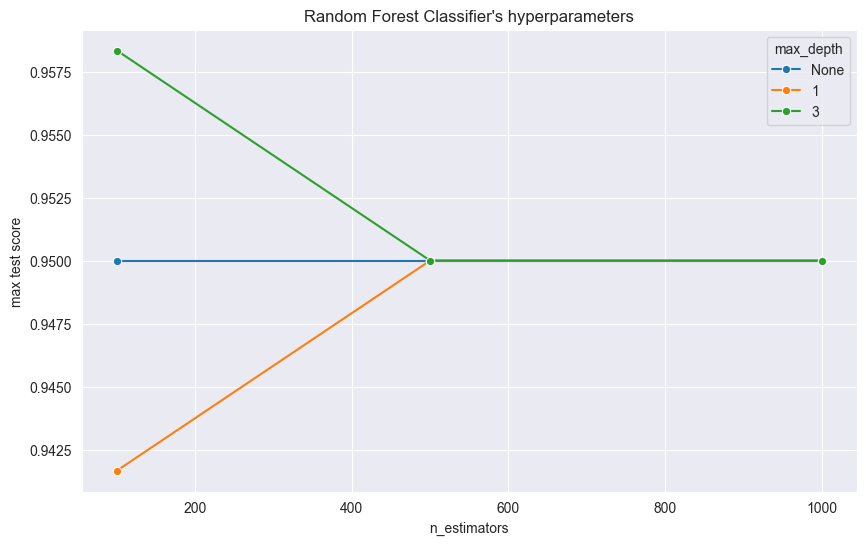

In [67]:
# 시각화
plt.figure(figsize = (10, 6))

sns.lineplot(data=cv_results_df, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', marker='o')

plt.title("Random Forest Classifier\'s hyperparameters")
plt.xlabel('n_estimators')
plt.ylabel('mean test score')
plt.ylabel('max test score')
plt.legend(title='max_depth')
plt.show()

param_n_estimators      100   500   1000
param_max_depth                         
1                   0.941667  0.95  0.95
3                   0.958333  0.95  0.95
None                0.950000  0.95  0.95


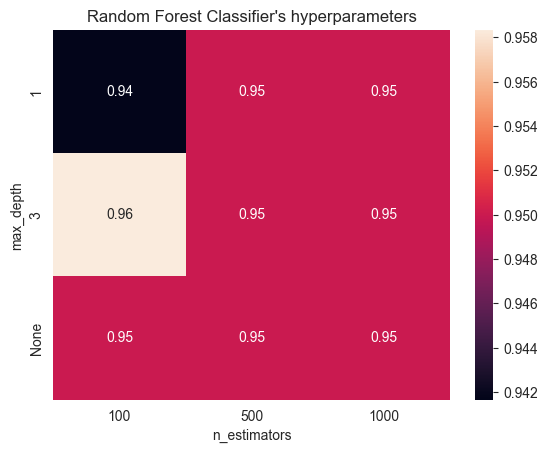

In [70]:
# 파라미터간 관계를 히트맵으로 표현
cv_pivot = cv_results_df.pivot(
    columns = 'param_n_estimators',
    index = 'param_max_depth',
    values = 'mean_test_score'
)
print(cv_pivot)

sns.heatmap(cv_pivot, annot=True, fmt='.2f')
plt.title('Random Forest Classifier\'s hyperparameters')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()


## RandomizedSearchCV
제공된 하이퍼파라미터 목록/범위에서 랜덤하게 샘플링해서 교차검증을 수행한다.
- 검증할 하이퍼파라미터의 종류/개수가 너무 많은 경우 적은 비용으로 최적화 가능
- 전역최적값을 놓칠 가능성이 높다.


In [73]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators' : [100, 500, 1000],
    'max_depth' : range(1, 11)
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5,
                                   scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

print(random_search.best_params_) # 가장 성능이 종았던 하이퍼파라미터 조합
print(random_search.best_score_) # 교차검증 평균 정확도
print(random_search.best_estimator_)
# 최적의 조합으로 재학습된 최종 모델 객체 -> predict, score 사용 가능

{'n_estimators': 100, 'max_depth': 10}
0.95
RandomForestClassifier(max_depth=10, random_state=42)


**와인데이터**


| 번호 | 특성 이름                           | 설명                            |
| -- | ------------------------------- | ----------------------------- |
| 0  | alcohol                         | 알코올 도수                        |
| 1  | malic\_acid                     | 사과산 농도                        |
| 2  | ash                             | 재 성분                          |
| 3  | alcalinity\_of\_ash             | 재의 알칼리도                       |
| 4  | magnesium                       | 마그네슘 함량                       |
| 5  | total\_phenols                  | 총 페놀                          |
| 6  | flavanoids                      | 플라보노이드                        |
| 7  | nonflavanoid\_phenols           | 비플라보노이드 페놀                    |
| 8  | proanthocyanins                 | 프로안토시아닌                       |
| 9  | color\_intensity                | 색의 강도                         |
| 10 | hue                             | 색조                            |
| 11 | od280/od315\_of\_diluted\_wines | 희석 와인의 광학 밀도 비율 (OD280/OD315) |
| 12 | proline                         | 프롤린 함량 (아미노산)                 |


**target**
- Class 0 (Cortese 와인)
- Class 1 (Barbera 와인)
- Class 2 (Grignolino 와인)


In [74]:
# 와인데이터 - LogisticRegression 최적의 파라미터 찾기
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [82]:
# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine_df.drop(['target'], axis=1)
y = wine_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=wine.target)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# LogisticRegression()
lr_clf = LogisticRegression()
# - max_iter : 1000 ~
# - solver : lbfgs, saga, liblinear, newton-cg, sag
# - penalty (과대적합방지) : l1, l2
# - C (규제 역수) : 0.001(강함) ~ 100(약함) 숫자가 작을수록 강함

param_grid = {
    'max_iter' : [300, 500, 1000],
    'solver' : ['lbfgs', 'liblinear', 'saga', 'newton-cg', 'sag'],
    'n_jobs': [-1,1],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1]
}


grid_search = GridSearchCV(lr_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy', refit=True)
                            #  refit=True 기본값 : 다시 재학습 시킨다. (생략 가능)
grid_search.fit(X_train, y_train)


print('최적의 파라미터 : ', grid_search.best_params_)
print('최적 검증점수: ', grid_search.best_score_)
best_estimator = grid_search.best_estimator_
print('평가점수 : ', best_estimator.score(X_test, y_test)

(142, 13) (142,)
(36, 13) (36,)


C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\TJ\anaconda3\envs\ai_env2\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
C:\Users\TJ\anacon

최적의 파라미터 :  {'C': 0.1, 'max_iter': 300, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}
최적 검증점수:  0.993103448275862
평가점수 :  0.9722222222222222


In [83]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_n_jobs,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001001,0.000001,0.000000,0.000000,0.001,300,-1,l1,lbfgs,"{'C': 0.001, 'max_iter': 300, 'n_jobs': -1, 'p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,169
1,0.005801,0.001167,0.001399,0.000490,0.001,300,-1,l1,liblinear,"{'C': 0.001, 'max_iter': 300, 'n_jobs': -1, 'p...",0.344828,0.344828,0.321429,0.321429,0.321429,0.330788,0.011463,157
2,0.017210,0.000758,0.002390,0.001005,0.001,300,-1,l1,saga,"{'C': 0.001, 'max_iter': 300, 'n_jobs': -1, 'p...",0.413793,0.413793,0.392857,0.392857,0.392857,0.401232,0.010256,145
3,0.000599,0.000489,0.000000,0.000000,0.001,300,-1,l1,newton-cg,"{'C': 0.001, 'max_iter': 300, 'n_jobs': -1, 'p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,169
4,0.000600,0.000490,0.000000,0.000000,0.001,300,-1,l1,sag,"{'C': 0.001, 'max_iter': 300, 'n_jobs': -1, 'p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.006000,0.000632,0.001200,0.000400,1.000,1000,1,l2,lbfgs,"{'C': 1, 'max_iter': 1000, 'n_jobs': 1, 'penal...",1.000000,0.965517,1.000000,0.964286,1.000000,0.985961,0.017199,67
236,0.003200,0.000399,0.001801,0.000748,1.000,1000,1,l2,liblinear,"{'C': 1, 'max_iter': 1000, 'n_jobs': 1, 'penal...",1.000000,0.931034,1.000000,0.964286,1.000000,0.979064,0.027713,97
237,0.007199,0.000980,0.001201,0.000400,1.000,1000,1,l2,saga,"{'C': 1, 'max_iter': 1000, 'n_jobs': 1, 'penal...",1.000000,0.965517,1.000000,0.964286,1.000000,0.985961,0.017199,67
238,0.009197,0.004536,0.002400,0.001019,1.000,1000,1,l2,newton-cg,"{'C': 1, 'max_iter': 1000, 'n_jobs': 1, 'penal...",1.000000,0.965517,1.000000,0.964286,1.000000,0.985961,0.017199,67
